In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.DataFrame()

In [3]:
df

""


In [4]:
np.random.seed(42)

In [5]:
X = np.random.rand(100, 1)-0.5

In [6]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [7]:
y = 3*X[:, 0]**2 +0.05 * np.random.randn(100)

In [8]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [9]:
df["X"] = X.reshape(100)

In [10]:
df["y"] = y

In [11]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

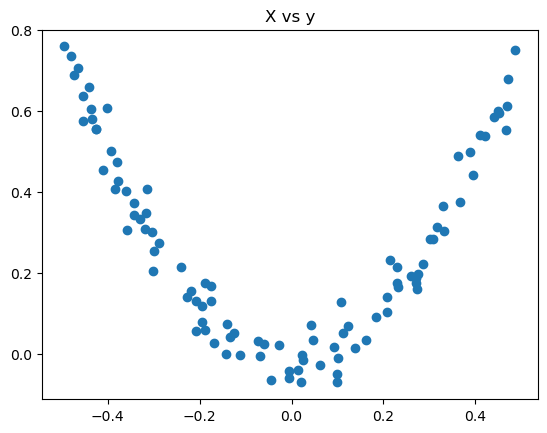

In [12]:
plt.scatter(df["X"], df["y"])
plt.title("X vs y")

In [13]:
df["pred1[base_model]"] = df["y"].mean()

In [14]:
df

,X,y,pred1[base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [15]:
df['res1'] = df["y"] - df["pred1[base_model]"]

In [16]:
df

,X,y,pred1[base_model],res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


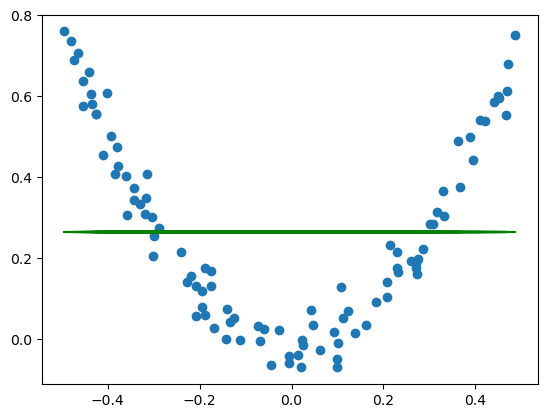

In [17]:
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], df["pred1[base_model]"], color="green")

In [18]:
X = df["X"].values.reshape(100, 1)

In [19]:
y = df["res1"]

In [20]:
from sklearn.tree import DecisionTreeRegressor
DT1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [21]:
DT1.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [22]:
from sklearn.tree import plot_tree

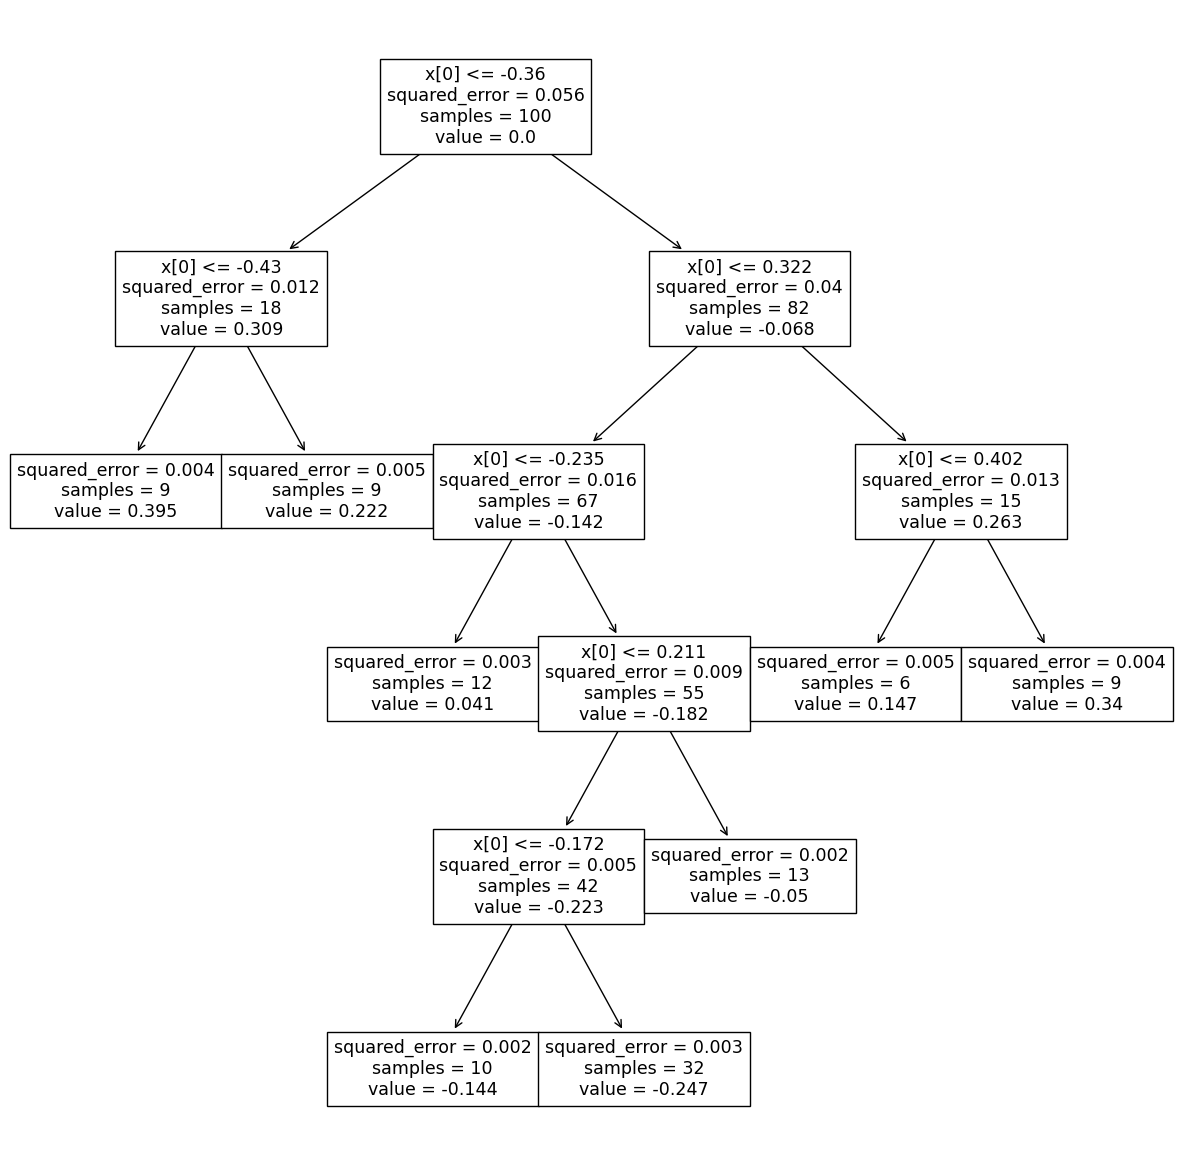

In [23]:
plt.figure(figsize=(15, 15))
plot_tree(DT1)
plt.show()

In [24]:
df["pred2"] = DT1.predict(X)

In [25]:
df

,X,y,pred1[base_model],res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


In [26]:
# res2 = act - (base+alpha*pred2)

In [27]:
BASE = df["pred1[base_model]"]

In [28]:
alpha = 0.1 # learning rate

In [29]:
df["res2"] = df["y"] - (BASE+(alpha*df["pred2"]))

In [30]:
df

,X,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [31]:
X = df["X"].values.reshape(100, 1)
y = df["res2"].values

In [32]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [33]:
y

array([-0.18917161,  0.29497884, -0.09443935, -0.31092247,  0.07447691,
        0.10336592,  0.35476119,  0.09616931, -0.25049645, -0.13594977,
        0.430284  ,  0.37938241,  0.02489423,  0.00440072,  0.03905091,
        0.07962134, -0.1712113 , -0.25528897, -0.24645548, -0.19349187,
       -0.18840529,  0.11525455, -0.12120473, -0.1988964 , -0.30572351,
       -0.03754724, -0.01605723, -0.28025052, -0.22318744,  0.33232044,
       -0.11173753,  0.06488293,  0.27541408,  0.30127143,  0.25500006,
        0.02351012, -0.13353309,  0.32107305, -0.14853713, -0.21492197,
        0.13913746, -0.29910862,  0.4025195 ,  0.24072528, -0.05539613,
       -0.2069734 , -0.07457407, -0.30962889, -0.2048561 ,  0.13796391,
        0.3125014 , -0.06171163,  0.28495958,  0.16232004, -0.28952446,
        0.23786081,  0.16720784,  0.03144986,  0.26947965, -0.08204674,
       -0.24272894, -0.11033122,  0.08470883, -0.2407289 , -0.09572988,
       -0.16991851,  0.03692306,  0.02270978,  0.26832337,  0.45

In [34]:
from sklearn.tree import DecisionTreeRegressor
DT2 = DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=8)

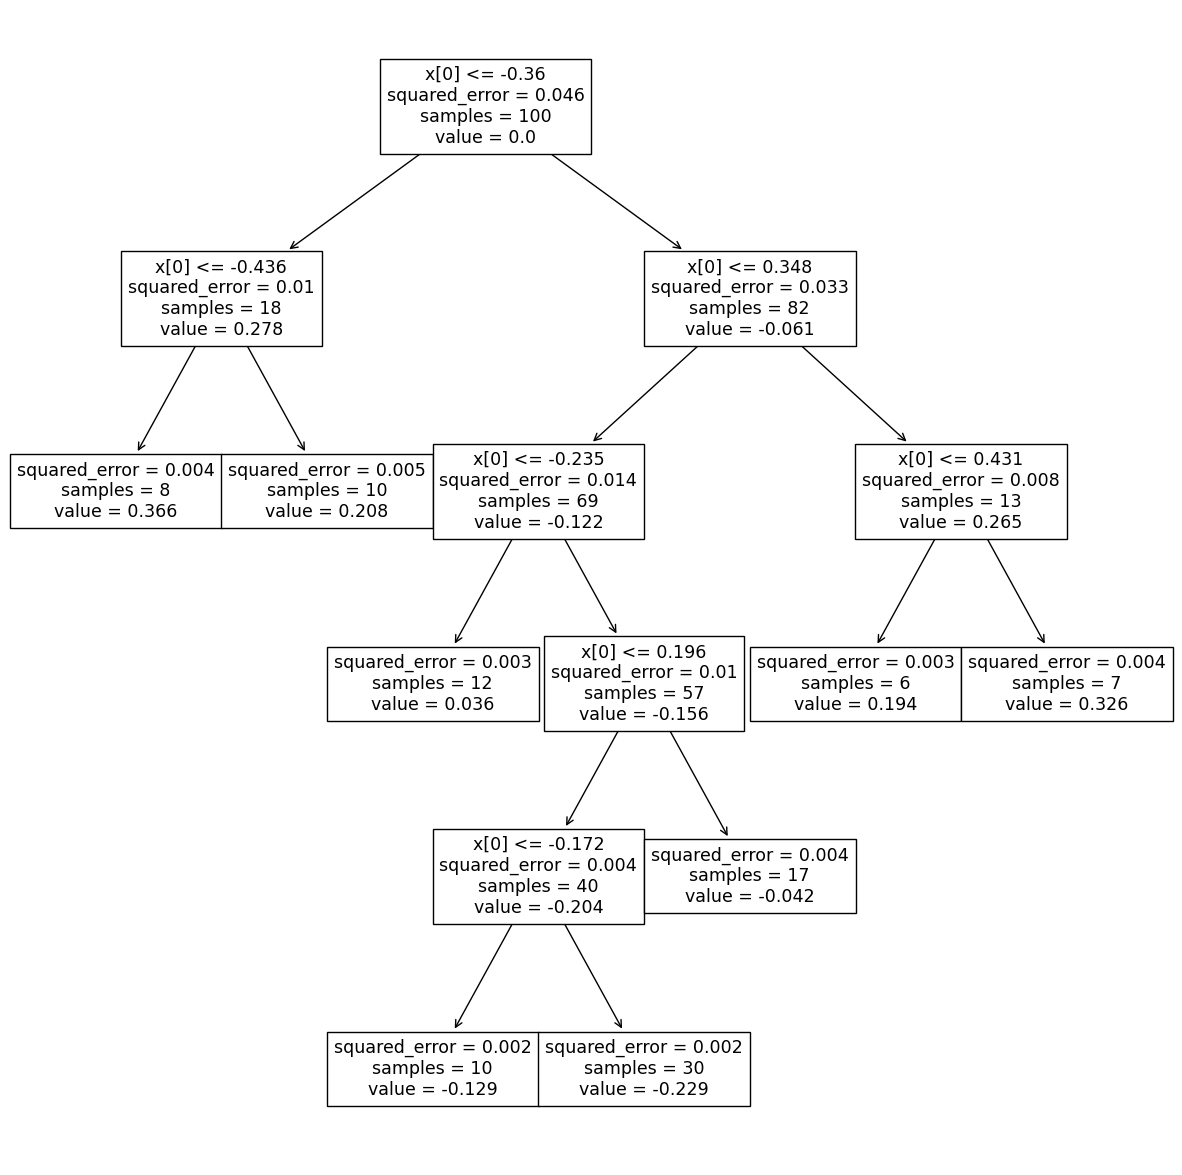

In [35]:
plt.figure(figsize=(15, 15))
plot_tree(DT2)
plt.show()

In [36]:
# final_pred = BASE+(alpha*DT1)+(alpha*DT2)

In [37]:
query = [[0.45071431]]

In [38]:
pred1 = DT1.predict(query)

In [39]:
pred2 = DT2.predict(query)

In [40]:
alpha

0.1

In [41]:
final_pred = BASE[0] + (alpha*pred1) + (alpha*pred2)

In [42]:
final_pred

array([0.3320561])